# Homework 1

• Matrix Multiplication<br>
&emsp;• Submit <br>
&emsp;&emsp;• Your approach to solve matrix multiplication problem of two matrices A and B, both with size n x n using divide <br>
&emsp;&emsp;&emsp;and conquer as shown below.<br>
&emsp;&emsp;• Your pseudo code and implementation.<br>
&emsp;&emsp;• Recurrence calculation and time + space complexity.<br>

Approach <br>
First we have to split the matrix into four submatrices of (n/2) x (n/2). For A these are 𝑎,𝑏,𝑐,𝑑 and for B they are 𝑒,𝑓,𝑔,ℎ. Then the result matric is by combining four block which are ae+bg,af+bh,ce+dg and cf+dh. then we are going to recurses this until it become 1x1 matric.

MatrixMultiply(A, B, n):
    if n = 1 then
        return A * B
    else
        split A into a, b, c, d
        split B into e, f, g, h

        C11 = MatrixMultiply(a, e) + MatrixMultiply(b, g)
        C12 = MatrixMultiply(a, f) + MatrixMultiply(b, h)
        C21 = MatrixMultiply(c, e) + MatrixMultiply(d, g)
        C22 = MatrixMultiply(c, f) + MatrixMultiply(d, h)

        return combine(C11, C12, C21, C22)


In [6]:
from math import ceil, log2

# Make addition and subtraction for submatric functions
def add(X, Y):
    n = len(X)
    return [[X[i][j] + Y[i][j] for j in range(n)] for i in range(n)]

def sub(X, Y):
    n = len(X)
    return [[X[i][j] - Y[i][j] for j in range(n)] for i in range(n)]

# Split and combine functions for submatric
def split(M):
    n = len(M)
    k = n // 2
    a = [row[:k] for row in M[:k]]
    b = [row[k:] for row in M[:k]]
    c = [row[:k] for row in M[k:]]
    d = [row[k:] for row in M[k:]]
    return a, b, c, d

def combine(C11, C12, C21, C22):
    k = len(C11)
    n = k * 2
    C = [[0]*n for _ in range(n)]
    for i in range(k):
        C[i][:k] = C11[i]
        C[i][k:] = C12[i]
        C[i+k][:k] = C21[i]
        C[i+k][k:] = C22[i]
    return C

# This is the main divide and conquer multiplication function
def _mult_dc(A, B):
    n = len(A)
    if n == 1:
        return [[A[0][0] * B[0][0]]]
    a,b,c,d = split(A)
    e,f,g,h = split(B)

    p1 = _mult_dc(a, e)
    p2 = _mult_dc(b, g)
    p3 = _mult_dc(a, f)
    p4 = _mult_dc(b, h)
    p5 = _mult_dc(c, e)
    p6 = _mult_dc(d, g)
    p7 = _mult_dc(c, f)
    p8 = _mult_dc(d, h)

    C11 = add(p1, p2)
    C12 = add(p3, p4)
    C21 = add(p5, p6)
    C22 = add(p7, p8)
    return combine(C11, C12, C21, C22)

# Pad matrix to next power of two size
def pad_to_pow2(M, size):
    n = len(M)
    P = [[0]*size for _ in range(size)]
    for i in range(n):
        for j in range(len(M[0])):
            P[i][j] = M[i][j]
    return P

# Main function to multiply two matrices of arbitrary size
def multiply_dc(A, B):
    n, m = len(A), len(A[0])
    p, q = len(B), len(B[0])
    assert m == p, "Inner dimensions must match"

    # pad to next power of two (square) for clean splitting
    k = max(n, m, q)
    s = 1 << ceil(log2(k))
    Ap = pad_to_pow2(A, s)
    Bp = pad_to_pow2(B, s)

    Cp = _mult_dc(Ap, Bp)

    # crop back to n x q
    C = [row[:q] for row in Cp[:n]]
    return C

if __name__ == "__main__":
    A = [[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]]
    B = [[0,1,0,1],[1,1,0,1],[0,0,1,1],[1,0,1,0]]
    print(multiply_dc(A,B))


[[6, 3, 7, 6], [14, 11, 15, 18], [22, 19, 23, 30], [30, 27, 31, 42]]


# Homework 2

• Determine space complexity of the presented examples:<br>
&emsp;• Maximum and minimum<br>
&emsp;• Sum of numbers<br>
&emsp;• Closest pair of points<br>
&emsp;• Fast exponentiation <br>

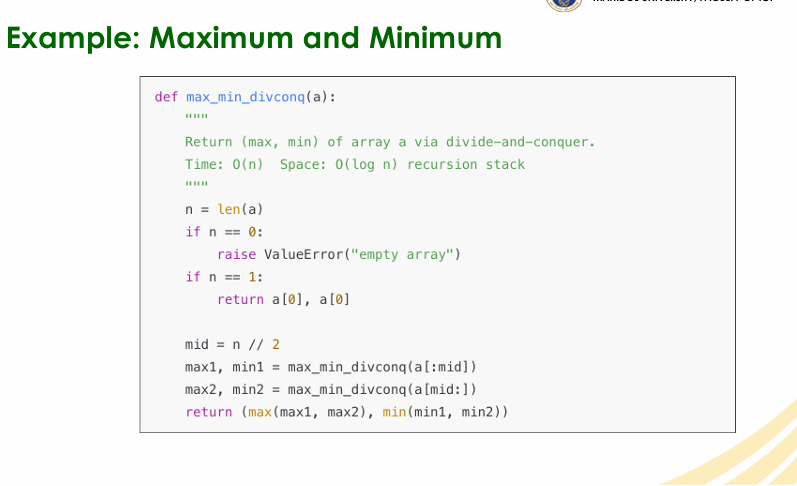

We use only max1, min1 , max2, min2 only which is O(1)
But everytime it pass the recursion step its got halved so its gonna be O(log n)

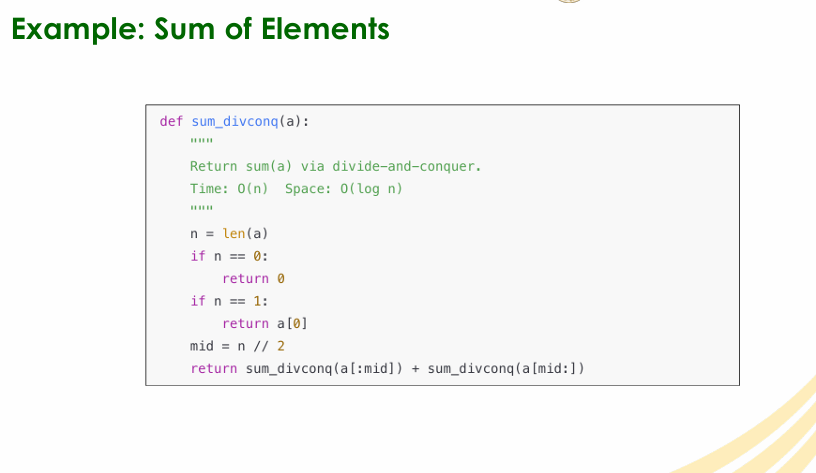

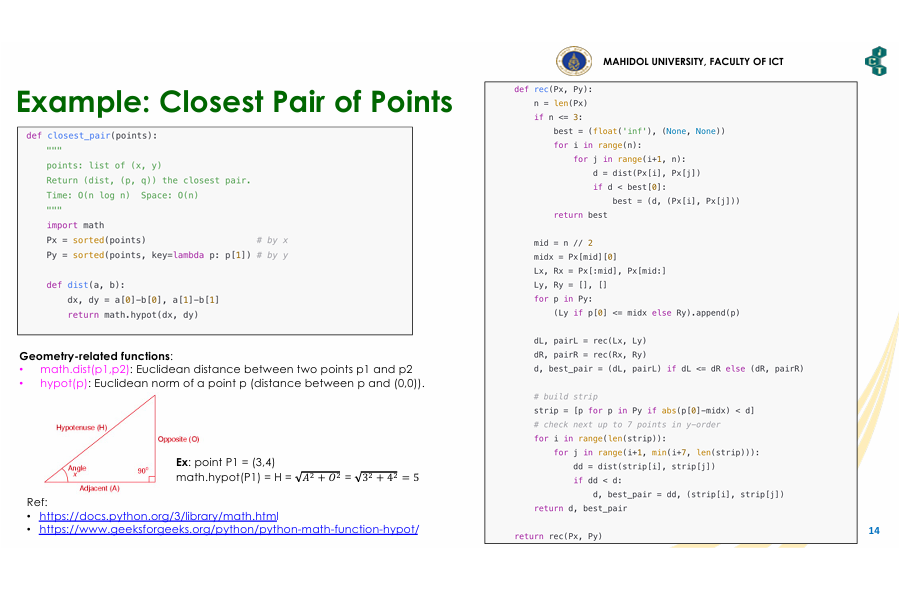

We need extra arrays sorted by x and y which is O(n).
Recursion stack adds O(log n), but O(n) dominates.
So its gonna be O(n)

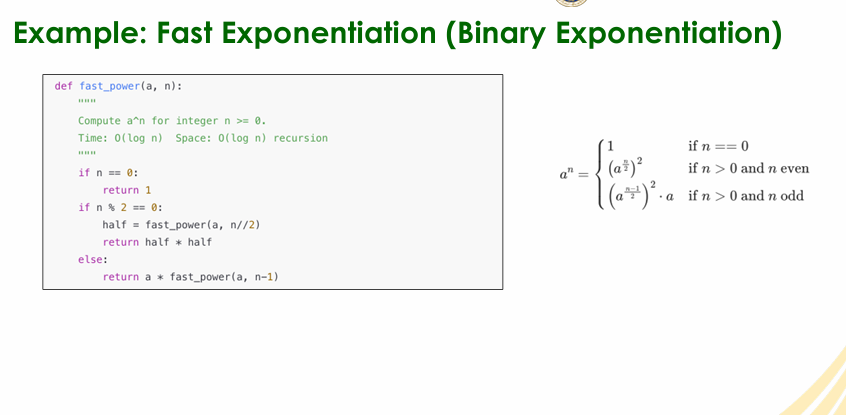

We only keep base, power, and result which is O(1).
Each step reduces the exponent by half, so recursion depth is O(log n).
So its gonna be O(log n)